## TODO


1.   implement GMM ⟶ LR
2.   implement EM
3.   implement NB
4.   implement visualizations for all



In [1]:
import os, sys, re, time, warnings
import sklearn
from sklearn import cluster, datasets, mixture, preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.utils.extmath import row_norms
import matplotlib as mpl
from timeit import default_timer as timer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode # mode is most frequently occuring
from itertools import cycle, islice

np.random.seed(0)

#%matplotlib inline



In [2]:
# Need toy dataset here
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width']
Y = pd.DataFrame(iris.target, columns=['Species'])

# Build k means model
km_model = KMeans(n_clusters=3)
clusters = km_model.fit_predict(X)

labels = np.zeros_like(clusters)
for i in range(3):
  cat = (clusters == i)
  labels[cat] = mode(iris.target[cat])[0]

km_acc = accuracy_score(iris.target, labels)
print(km_acc)

0.8866666666666667


In [3]:
yqrs = zip(X['Sepal_length'], X['Sepal_width'])

<Axes: xlabel='Sepal_length', ylabel='Sepal_width'>

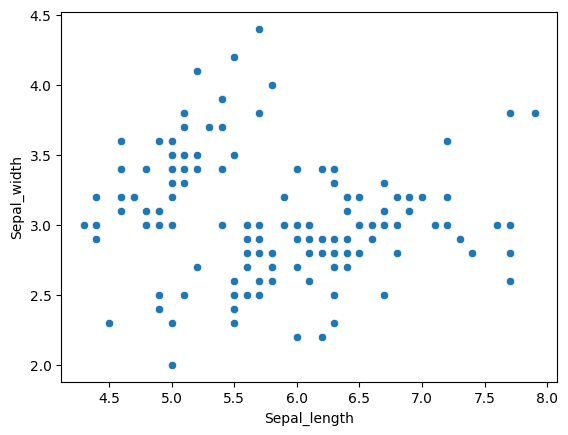

In [4]:
#sns.scatterplot(X['Sepal_length'], X['Sepal_width'], hue=Y['Species'])
sns.scatterplot(x=X['Sepal_length'],y=X['Sepal_width'])
sns.scatterplot()

In [5]:
# General EM for GMM

# Transform data so the distribution mean is 0 and standard deviation is 1
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)
xs = pd.DataFrame(scaled_X, columns=X.columns)

In [6]:

gmm = GaussianMixture(n_components=3)
#gmm.fit(X)
gmm_y = gmm.fit_predict(xs)

labels = np.zeros_like(clusters)
for i in range(3):
  cat = (gmm_y == i)
  labels[cat] = mode(iris.target[cat])[0]

gmm_acc = accuracy_score(iris.target, labels)
print("Accuracy using GMM = ", gmm_acc)



Accuracy using GMM =  0.9666666666666667


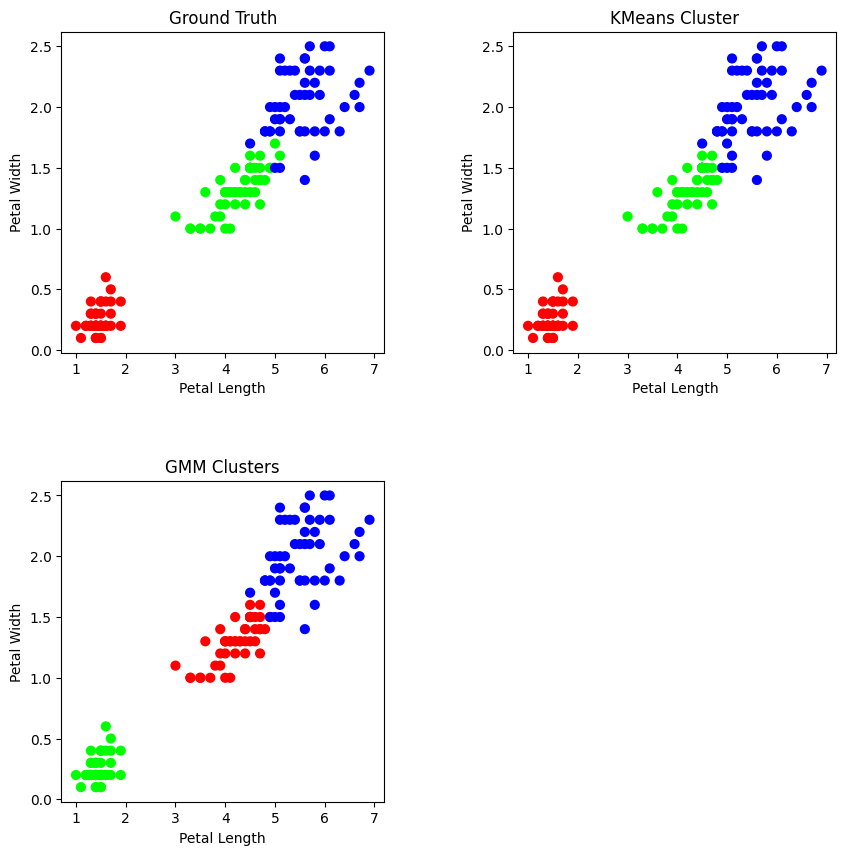

In [7]:
plt.figure(figsize=(10,10))
colormap = np.array(['red', 'lime', 'blue'])


# Plot GT using petal length and width
plt.subplot(2,2,1)
plt.scatter(X.Petal_length, X.Petal_width, c=colormap[Y.Species], s=40)
plt.title('Ground Truth')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plot k means model predictions
plt.subplot(2,2,2)
plt.scatter(X.Petal_length, X.Petal_width, c=colormap[labels], s=40)
plt.title('KMeans Cluster')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plot Gaussian Mixture predictions
plt.subplot(2,2,3)
plt.scatter(X.Petal_length, X.Petal_width, c=colormap[gmm_y], s=40)
#plt.title('Gaussian Mixture')
plt.title('GMM Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [8]:
# also, GMR (Gaussian Mixture Regression) or GMC (Gaussian Mixture Classification)

Covariance Matrix Definition  
Variance covariance matrix is defined as a square matrix where the diagonal elements represent the variance and the off-diagonal elements represent the covariance. The covariance between two variables can be positive, negative, and zero. A positive covariance indicates that the two variables have a positive relationship whereas negative covariance shows that they have a negative relationship. If two elements do not vary together then they will display a zero covariance.  

Covariance Matrix Example  
Suppose there are two data sets $X = {3, 2}$ and $Y = {7, 4}$. The sample variance of dataset $X = 0.5$, and $Y = 4.5$. The covariance between $X$ and $Y$ is 1.5. The covariance matrix is expressed as follows:
<table class="tg">
<tbody>
  <tr>
    <td class="tg-0pky">0.5</td>
    <td class="tg-0pky">1.5</td>
  </tr>
  <tr>
    <td class="tg-0pky">1.5</td>
    <td class="tg-0pky">4.5</td>
  </tr>
</tbody>
</table>

A detailed description of how to find the variance covariance matrix will be covered in the upcoming sections.

Covariance Matrix Formula  

To determine the covariance matrix, the formulas for variance and covariance are required. Depending upon the type of data available, the variance and covariance can be found for both sample data and population data. These formulas are given below.  
$$
\text{Population Variance: }var(x) = \frac{∑^{n}_{1}(x_{i}−μ)^{2}}{n}
$$

$$
\text{Population Covariance: }cov(x, y) = \frac{∑^{n}_{1}(x_{i}−μ_{x})(y_{i}−μ_{y})}{n}
$$

$$
\text{Sample Variance: }var(x) = \frac{∑^{n}_{1}(x_{i}−\bar{x})^{2}}{n-1}
$$

$$
\text{Sample Covariance: }cov(x, y) = \frac{ ∑^{n}_{1}(x_{i}−\bar{x})(y_{i}−\bar{y})}{n−1}
$$

$μ = \text{mean of population data.}$  
$\bar{x} = \text{mean of sample data.}$  
$n = \text{number of observations in the dataset.}$  
$x_{i} = \text{observations in dataset x.}$  
Using these formulas, the general form of a variance covariance matrix is given as follows:


Covariance Matrix 3 × 3

If there are 3 datasets, x, y, and z, then the formula to find the 3 × 3 covariance matrix is given below:
<table class="tg">
<tbody>
  <tr>
    <td class="tg-0pky">var(x)</td>
    <td class="tg-0pky">cov(x,y)</td>
    <td class="tg-0pky">cov(x,z)</td>
  </tr>
  <tr>
    <td class="tg-0pky">cov(x,y)</td>
    <td class="tg-0pky">var(y)</td>
    <td class="tg-0pky">cov(y,z)</td>
  </tr>
    <tr>
    <td class="tg-0pky">cov(x,z)</td>
    <td class="tg-0pky">cov(y,z)</td>
    <td class="tg-0pky">var(z)</td>
  </tr>
</tbody>
</table>

How To Calculate Covariance Matrix?  
The number of variables determines the dimension of a variance-covariance matrix. For example, if there are two variables (or datasets) it indicates that the covariance matrix will be 2 dimensional. Suppose the math and science scores of 3 students are given as follows:  
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">Student</th>
    <th class="tg-0pky">Math (X)</th>
    <th class="tg-0pky">Science (Y)</th>

  </tr></thead>
<tbody>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">92</td>
    <td class="tg-0pky">80</td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">60</td>
    <td class="tg-0pky">30</td>
  </tr>
    <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">100</td>
    <td class="tg-0pky">70</td>
  </tr>
</tbody>
</table>

The steps to calculate the covariance matrix for the sample are given below:

<p>Step 1: Find the mean of one variable $(X)$. This can be done by dividing the sum of all observations by the number of observations.  Thus, $(92 + 60 + 100) / 3 = 84 $ </p><p>
Step 2: Subtract the mean from all observations; $(92 - 84), (60 - 84), (100 - 84)$  </p><p>
Step 3: Take the sum of the squares of the differences obtained in the previous step.   
&emsp; &emsp; $\qquad  (92 - 84)2 + (60 - 84)2 + (100 - 84)2. $ </p><p>
Step 4: Divide this value by 1 less than the total to get the sample variance of the first variable $(X)$.  
&emsp; $\qquad var(X) = [(92 - 84)2 + (60 - 84)2 + (100 - 84)2] / (3 - 1) = 448  $</p><p>
Step 5: Repeat steps 1 to 4 to find the variances of all variables. Using these steps, $var(Y) = 700. $ </p><p>
Step 6: Choose a pair of variables $(X \text{ and } Y).$  </p><p>
Step 7: Subtract the mean of the first variable $(X)$ from all observations;  
&emsp;&emsp;  $\qquad  (92 - 84), (60 - 84), (100 - 84).$ </p><p>
Step 8: Repeat step 7 for the second variable $(Y)$;   

&emsp; $\qquad  (80 - 60), (30 - 60), (70 - 60). $ </p><p>
Step 9: Multiply the corresponding observations.  
&emsp; $\qquad  (92 - 84)(80 - 60), (60 - 84)(30 - 60), (100 - 84)(70 - 60).$  </p><p>
Step 10: Add these values and divide them by $(n - 1)$ to get the covariance.  
&emsp; $\qquad   cov(x, y) = cov(y, x) = [(92 - 84)(80 - 60) + (60 - 84)(30 - 60) + (100 - 84)(70 - 60)] / (3 - 1) = 520. $ </p><p>
Step 11: Repeat steps 6 to 10 for different pairs of variables.  </p><p>
Step 12: Now using the general formula for covariance matrix arrange these values in matrix form. Thus, the variance covariance matrix for the example is given as
 </p>  
 <table class="tg">
<tbody>
  <tr>
    <td class="tg-0pky">448</td>
    <td class="tg-0pky">520</td>
  </tr>
  <tr>
    <td class="tg-0pky">520</td>
    <td class="tg-0pky">700</td>
  </tr>
</tbody>
</table>
  
<p></p>
The same steps can be followed while calculating the covariance matrix for a population. The only difference is that the population variance and covariance formulas will be applied.

Properties of Covariance Matrix
Covariance matrix is a very important tool used by data scientists to understand and analyze multivariate data. Listed below are the various properties of this matrix that make it extremely useful.

A covariance matrix is always a square matrix. This means that the number of rows of the matrix will be equal to the number of columns.
The matrix is symmetric. Suppose $M$ is the covariance matrix then $M^{T} = M$.
It is positive semi-definite. Let $u$ be a column vector, $u^{T}$ is the transpose of that vector and $M$ be the covariance matrix then $u^{T}Mu ≥ 0$.
All eigenvalues of the variance covariance matrix are real and non-negative.


<table class="tg">
<tbody>
  <tr>
    <td class="tg-0pky">a</td>
    <td class="tg-0pky">b</td>
  </tr>
  <tr>
    <td class="tg-0pky">c</td>
    <td class="tg-0pky">d</td>
  </tr>
</tbody>
</table>

In [9]:

"""sklearn.mixture.GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100,
   n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None,
   warm_start=False, verbose=0, verbose_interval=10)"""
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm.means_

array([[10.,  2.],
       [ 1.,  2.]])

In [10]:
#gmm.__dir__()
gm.predict([[0, 0], [12, 3]])

array([1, 0])

In [11]:
gm.score([[0, 0], [12, 3]])

-1249996.5824336133

In [12]:
gm.score_samples([[0, 0], [12, 3]])

array([ -499996.8636835 , -1999996.30118373])

In [13]:
g = gm.get_params([[0, 0], [12, 3]])
g

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': 0,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [14]:
gm.predict_proba(X)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# GMM Initialization Methods  
Examples of the different methods of initialization in Gaussian Mixture Models

See [Gaussian mixture models](https://scikit-learn.org/1.2/modules/mixture.html#gmm) for more information on the estimator.

Here we generate some sample data with four easy to identify clusters. The purpose of this example is to show the four different methods for the initialization parameter *init_param*.

The four initializations are *kmeans* (default), *random*, *random_from_data* and *k-means*++.

Orange diamonds represent the initialization centers for the gmm generated by the *init_param*. The rest of the data is represented as crosses and the colouring represents the eventual associated classification after the GMM has finished.

The numbers in the top right of each subplot represent the number of iterations taken for the GaussianMixture to converge and the relative time taken for the initialization part of the algorithm to run. The shorter initialization times tend to have a greater number of iterations to converge.

The initialization time is the ratio of the time taken for that method versus the time taken for the default *kmeans* method. As you can see all three alternative methods take less time to initialize when compared to *kmeans*.

In this example, when initialized with *random_from_data* or *random* the model takes more iterations to converge. Here *k-means*++ does a good job of both low time to initialize and low number of GaussianMixture iterations to converge.



sklearn.mixture.GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100,
   n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None,
   warm_start=False, verbose=0, verbose_interval=10)


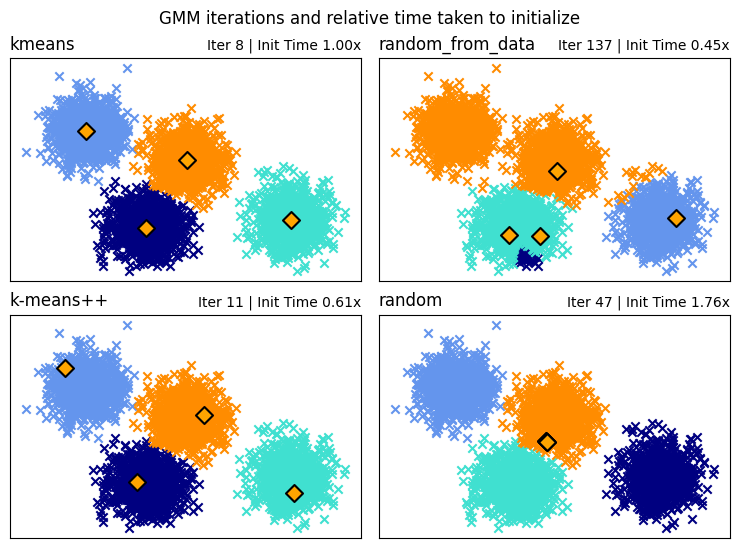

In [15]:
# Author: Gordon Walsh <gordon.p.walsh@gmail.com>
# Data generation code from Jake Vanderplas <vanderplas@astro.washington.edu>



print(__doc__)

# Generate some data

X, y_true = make_blobs(n_samples=4000, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]

n_samples = 4000
n_components = 4
x_squared_norms = row_norms(X, squared=True)


def get_initial_means(X, init_params, r):
    # Run a GaussianMixture with max_iter=0 to output the initalization means
    gmm = GaussianMixture(
        n_components=4, init_params=init_params, tol=1e-9, max_iter=0, random_state=r
    ).fit(X)
    return gmm.means_


methods = ["kmeans", "random_from_data", "k-means++", "random"]
colors = ["navy", "turquoise", "cornflowerblue", "darkorange"]
times_init = {}
relative_times = {}

plt.figure(figsize=(4 * len(methods) // 2, 6))
plt.subplots_adjust(
    bottom=0.1, top=0.9, hspace=0.15, wspace=0.05, left=0.05, right=0.95
)

for n, method in enumerate(methods):
    r = np.random.RandomState(seed=1234)
    plt.subplot(2, len(methods) // 2, n + 1)

    start = timer()
    ini = get_initial_means(X, method, r)
    end = timer()
    init_time = end - start

    gmm = GaussianMixture(
        n_components=4, means_init=ini, tol=1e-9, max_iter=2000, random_state=r
    ).fit(X)

    times_init[method] = init_time
    for i, color in enumerate(colors):
        data = X[gmm.predict(X) == i]
        plt.scatter(data[:, 0], data[:, 1], color=color, marker="x")

    plt.scatter(
        ini[:, 0], ini[:, 1], s=75, marker="D", c="orange", lw=1.5, edgecolors="black"
    )
    relative_times[method] = times_init[method] / times_init[methods[0]]

    plt.xticks(())
    plt.yticks(())
    plt.title(method, loc="left", fontsize=12)
    plt.title(
        "Iter %i | Init Time %.2fx" % (gmm.n_iter_, relative_times[method]),
        loc="right",
        fontsize=10,
    )
plt.suptitle("GMM iterations and relative time taken to initialize")
plt.show()

# GMM covariances  
Demonstration of several covariances types for Gaussian mixture models.

Although GMM are often used for clustering, we can compare the obtained clusters with the actual classes from the dataset. We initialize the means of the Gaussians with the means of the classes from the training set to make this comparison valid.

We plot predicted labels on both training and held out test data using a variety of GMM covariance types on the iris dataset. We compare GMMs with spherical, diagonal, full, and tied covariance matrices in increasing order of performance. Although one would expect full covariance to perform best in general, it is prone to overfitting on small datasets and does not generalize well to held out test data.

On the plots, train data is shown as dots, while test data is shown as crosses. The iris dataset is four-dimensional. Only the first two dimensions are shown here, and thus some points are separated in other dimensions.

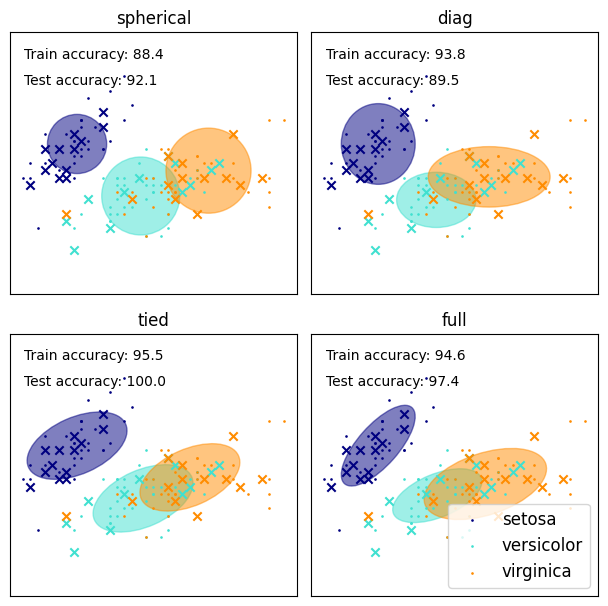

In [16]:
# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause



colors = ["navy", "turquoise", "darkorange"]


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], angle=180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")


iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array(
        [X_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, color=color, label=iris.target_names[n]
        )
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()

# Comparing different clustering algorithms on toy datasets  
This example shows characteristics of different clustering algorithms on datasets that are “interesting” but still in 2D. With the exception of the last dataset, the parameters of each of these dataset-algorithm pairs has been tuned to produce good clustering results. Some algorithms are more sensitive to parameter values than others.

The last dataset is an example of a ‘null’ situation for clustering: the data is homogeneous, and there is no good clustering. For this example, the null dataset uses the same parameters as the dataset in the row above it, which represents a mismatch in the parameter values and the data structure.

While these examples give some intuition about the algorithms, this intuition might not apply to very high dimensional data.

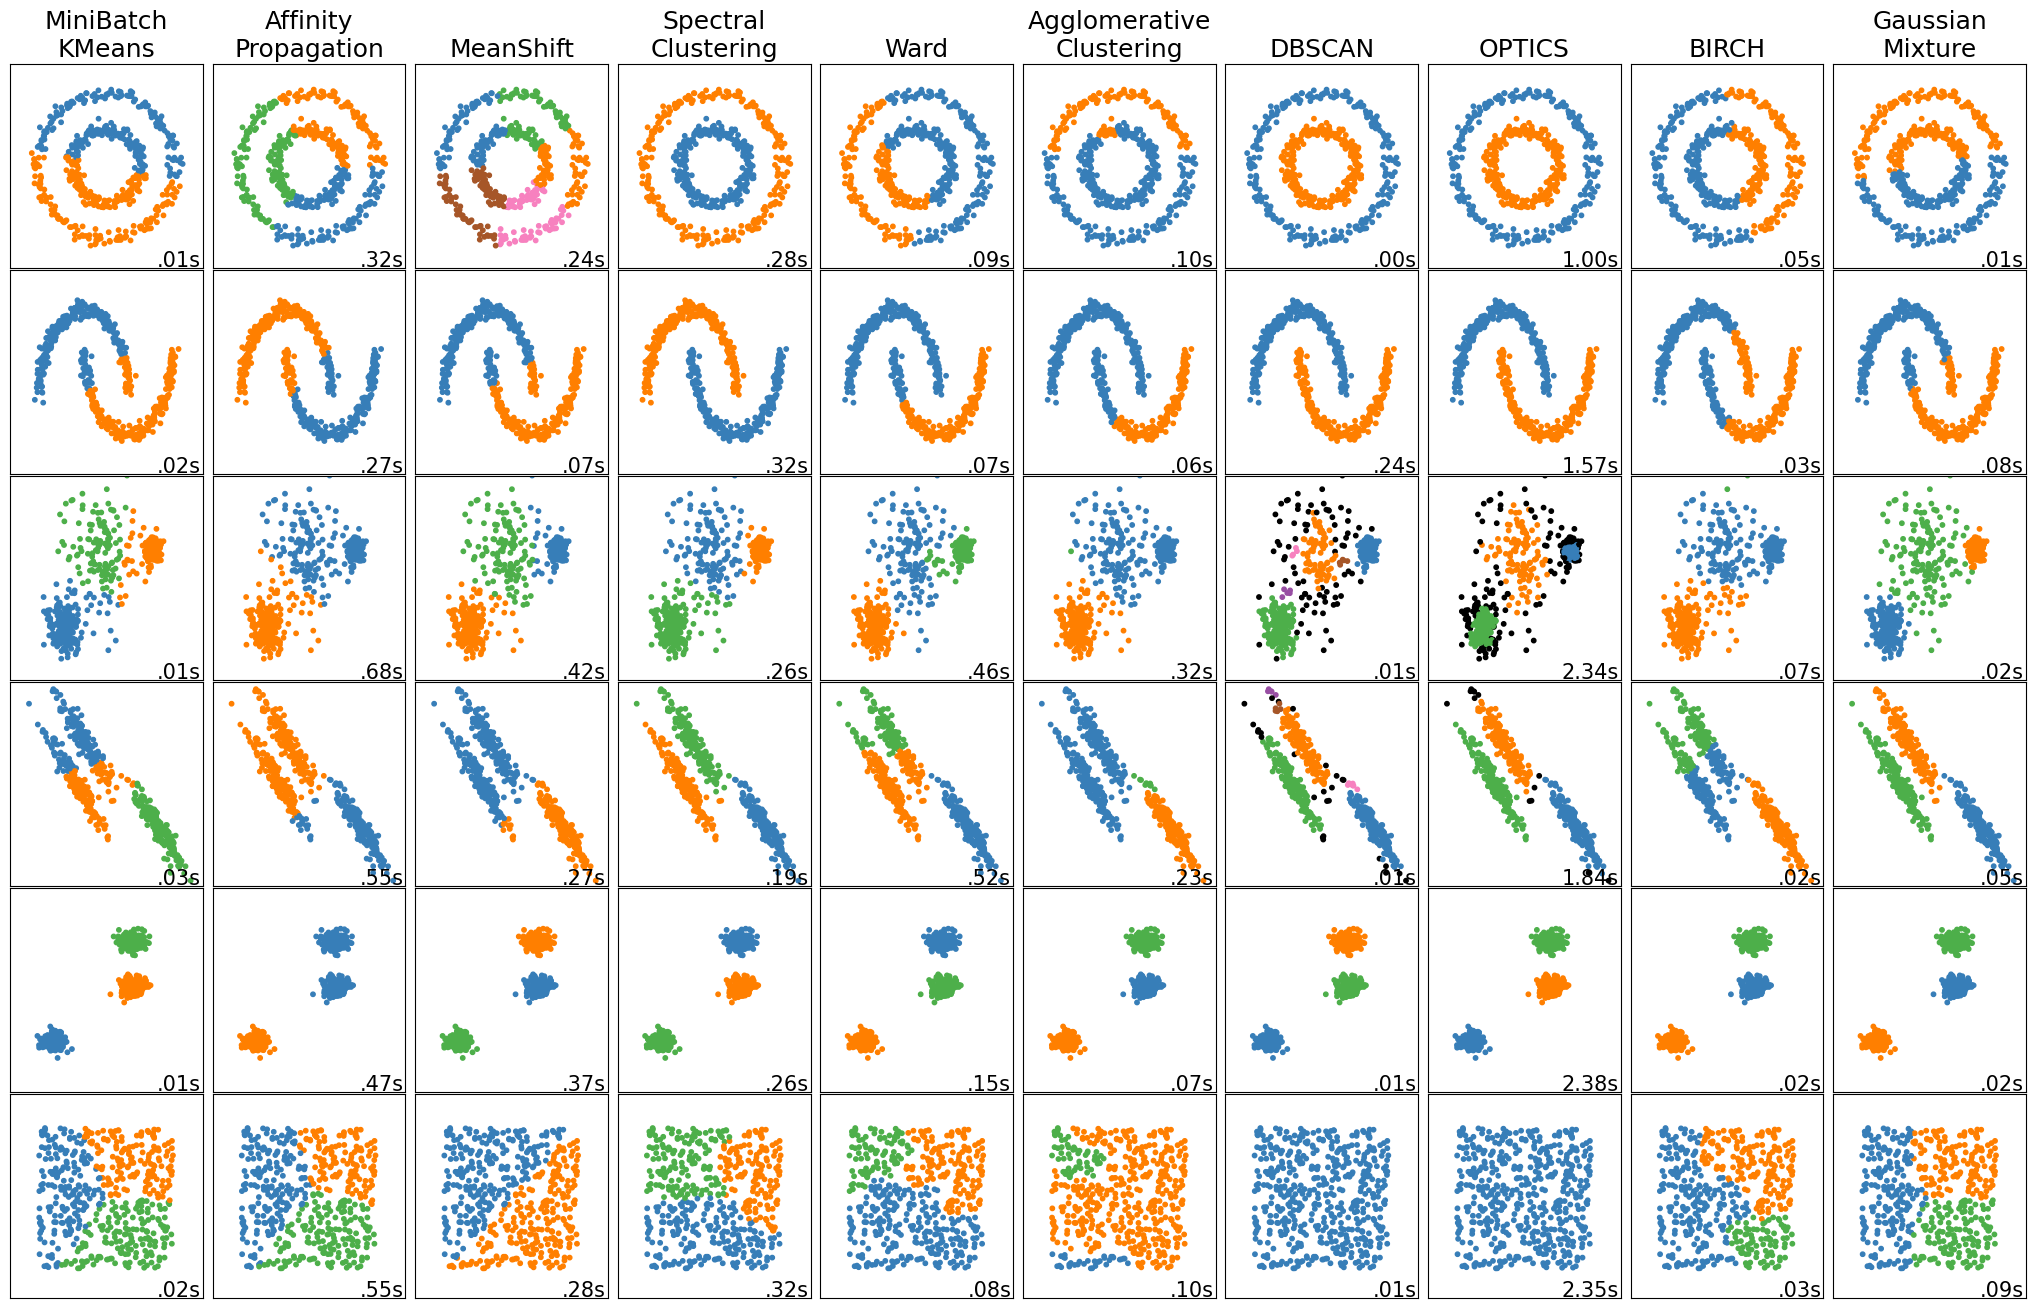

In [17]:


# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"], n_init="auto")
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

# Demonstration of k-means assumptions  
This example is meant to illustrate situations where k-means produces unintuitive and possibly undesirable clusters.  
## Data generation  
The function [make_blobs](https://scikit-learn.org/1.2/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) generates isotropic (spherical) gaussian blobs. To obtain anisotropic (elliptical) gaussian blobs one has to define a linear transformation.

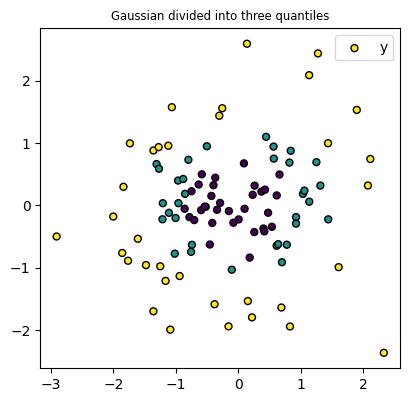

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles

plt.figure(figsize=(4, 4))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
#plt.plot(x, x, label='linear')
cmap = ListedColormap(["blue", "green", "grey"])

plt.subplot()
plt.title("Gaussian divided into three quantiles", fontsize="small")
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
#plt.scatter(X1[:, 0], X1[:, 1], marker="o",  s=25, cmap=cmap, edgecolor="k")
plt.legend(['x', 'y', 'unlabled'])
plt.legend([ 'y', 'unlabled'])
plt.show()

In [19]:
plt.rcParams['figure.figsize'] = (12.0, 12.0)

<ipython-input-20-bfb9d97ed2d0>:14: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data2 = np.random.multivariate_normal(mean2, cov2, size2)


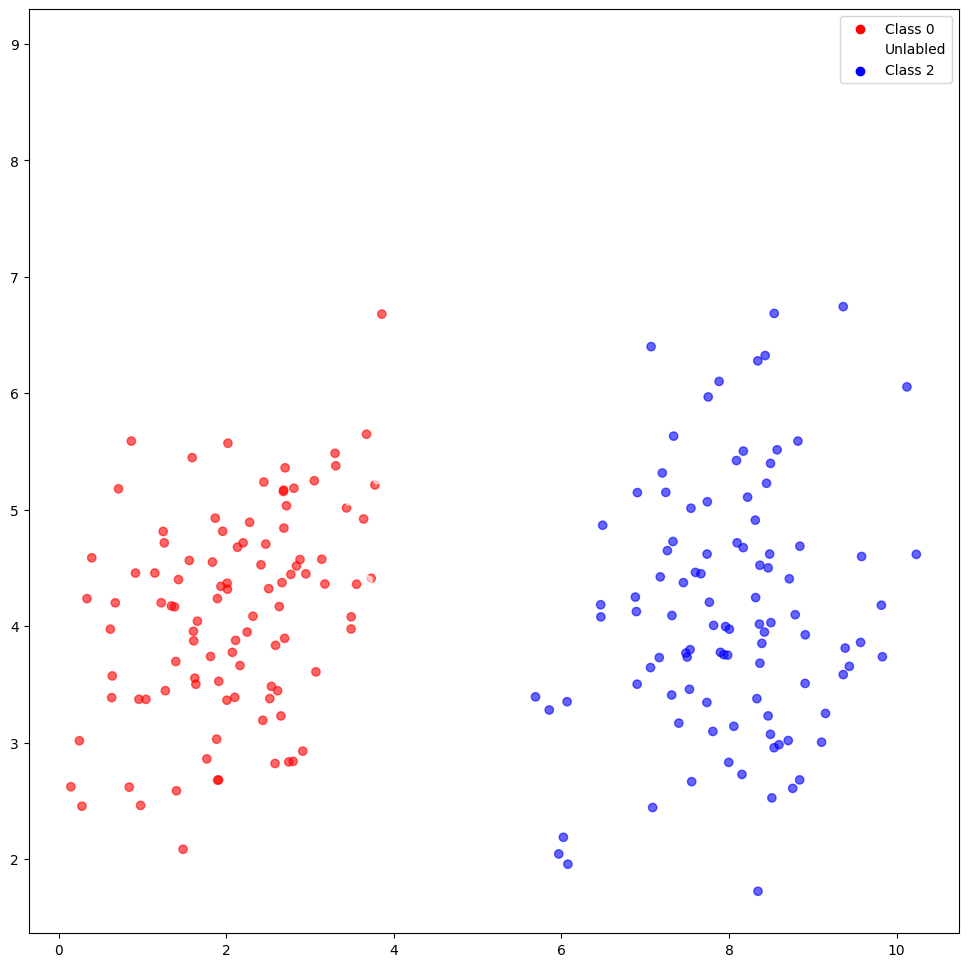

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters for three Gaussian distributions
mean1, cov1, size1 = [2, 4], [[1, 0.5], [0.5, 1]], 100  # Class 0
mean2, cov2, size2 = [5, 5], [[1, -0.3], [0.3, 1]], 200  # Class 1
mean3, cov3, size3 = [8, 4], [[1, 0.2], [0.2, 1]], 100  # Class 2

# Generate data points for each class
data1 = np.random.multivariate_normal(mean1, cov1, size1)
data2 = np.random.multivariate_normal(mean2, cov2, size2)
data3 = np.random.multivariate_normal(mean3, cov3, size3)

# Combine all data points
data = np.vstack((data1, data2, data3))

# Create labels for the data
labels = np.array([0] * size1 + [1] * size2 + [2] * size3)

# Scatter plot with colored points based on labels
colors = np.array(['red', 'white', 'blue'])
scatter = plt.scatter(data[:, 0], data[:, 1], c=colors[labels], alpha=0.6)

# Manually create legend handles
legend_labels = ['Class 0', 'Unlabled', 'Class 2']
for i, color in enumerate(colors):
    plt.scatter([], [], c=color, label=legend_labels[i])

# Add labels and title
#plt.title('Scatter Plot of Gaussian Distributions')
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')
plt.legend()

# Display the plot
plt.show()


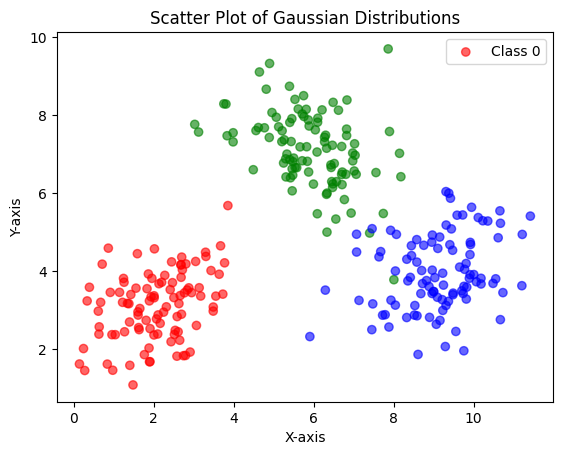

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters for three Gaussian distributions
mean1, cov1, size1 = [2, 3], [[1, 0.5], [0.5, 1]], 100  # Class 1
mean2, cov2, size2 = [6, 7], [[1, -0.3], [-0.3, 1]], 100  # Class 2
mean3, cov3, size3 = [9, 4], [[1, 0.2], [0.2, 1]], 100  # Class 3

# Generate data points for each class
data1 = np.random.multivariate_normal(mean1, cov1, size1)
data2 = np.random.multivariate_normal(mean2, cov2, size2)
data3 = np.random.multivariate_normal(mean3, cov3, size3)

# Combine all data points
data = np.vstack((data1, data2, data3))

# Create labels for the data
labels = np.array([0] * size1 + [1] * size2 + [2] * size3)

# Scatter plot with colored points based on labels
colors = np.array(['red', 'green', 'blue'])
plt.scatter(data[:, 0], data[:, 1], c=colors[labels], alpha=0.6)

# Add labels and title
plt.title('Scatter Plot of Gaussian Distributions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

# Display the plot
plt.show()


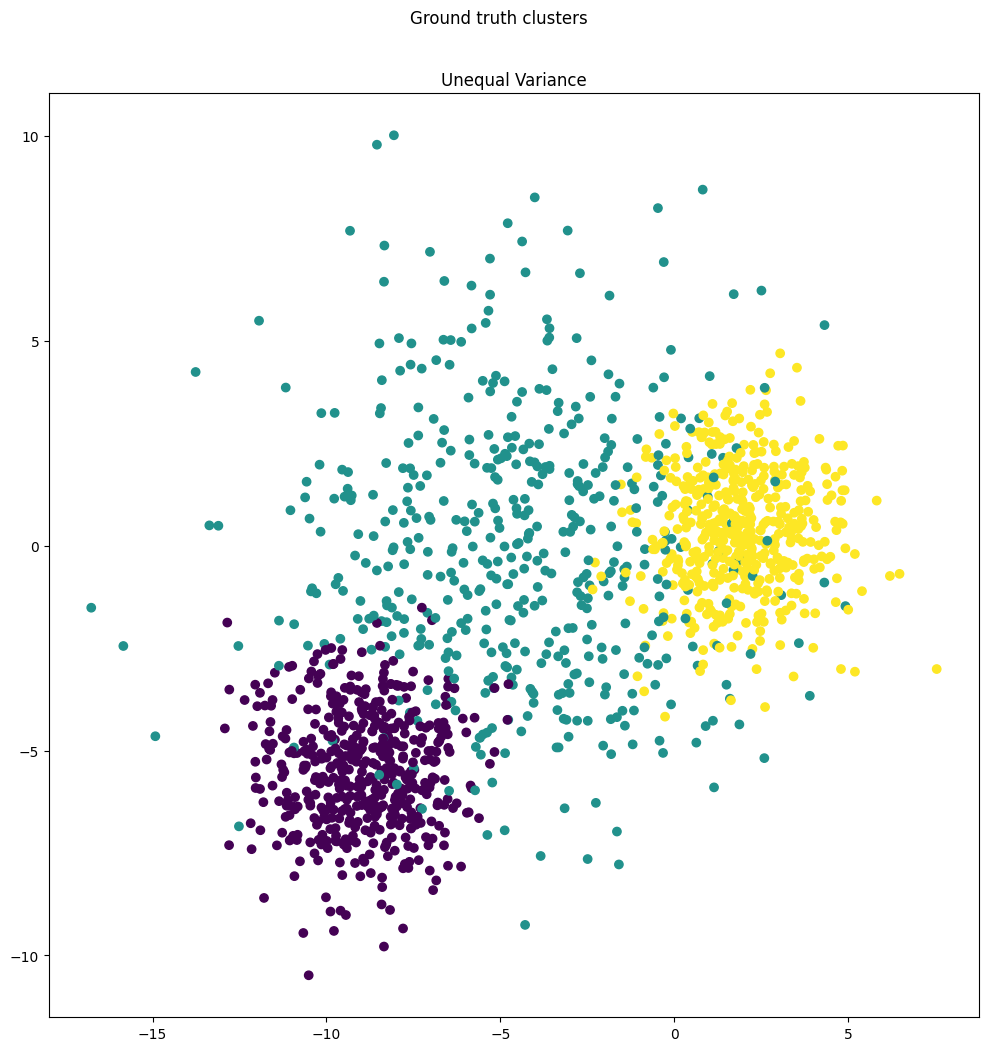

In [26]:
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]


X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.5, 3.5, 1.5], random_state=random_state
)  # Unequal variance


# We can visualize the resulting data:

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
axs.legend()


axs.scatter(X_varied[:, 0], X_varied[:, 1], label='linear',c=y_varied)
axs.set_title("Unequal Variance")



plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

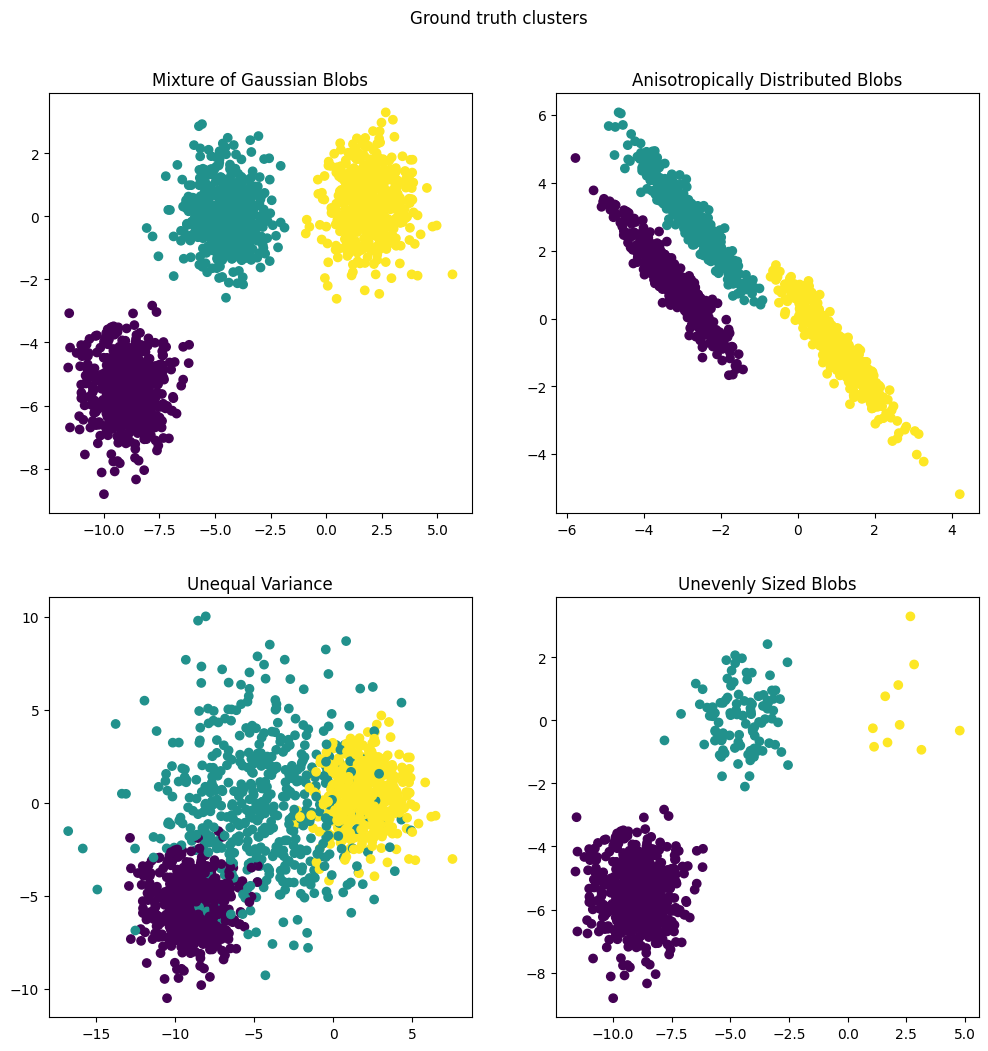

In [24]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
#         Arturo Amor <david-arturo.amor-quiroz@inria.fr>
# License: BSD 3 clause

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.5, 3.5, 1.5], random_state=random_state
)  # Unequal variance
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [1] * 500 + [2] * 100 + [3] * 10

# We can visualize the resulting data:

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mixture of Gaussian Blobs")

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Unequal Variance")

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

## Fit models and plot results  
The previously generated data is now used to show how [KMeans](https://scikit-learn.org/1.2/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) behaves in the following scenarios:


*   Non-optimal number of clusters: in a real setting there is no uniquely defined true number of clusters. An appropriate number of clusters has to be decided from data-based criteria and knowledge of the intended goal.
*   Anisotropically distributed blobs: k-means consists of minimizing sample’s euclidean distances to the centroid of the cluster they are assigned to. As a consequence, k-means is more appropriate for clusters that are isotropic and normally distributed (i.e. spherical gaussians).
*   Unequal variance: k-means is equivalent to taking the maximum likelihood estimator for a “mixture” of k gaussian distributions with the same variances but with possibly different means.
*   Unevenly sized blobs: there is no theoretical result about k-means that states that it requires similar cluster sizes to perform well, yet minimizing euclidean distances does mean that the more sparse and high-dimensional the problem is, the higher is the need to run the algorithm with different centroid seeds to ensure a global minimal inertia.





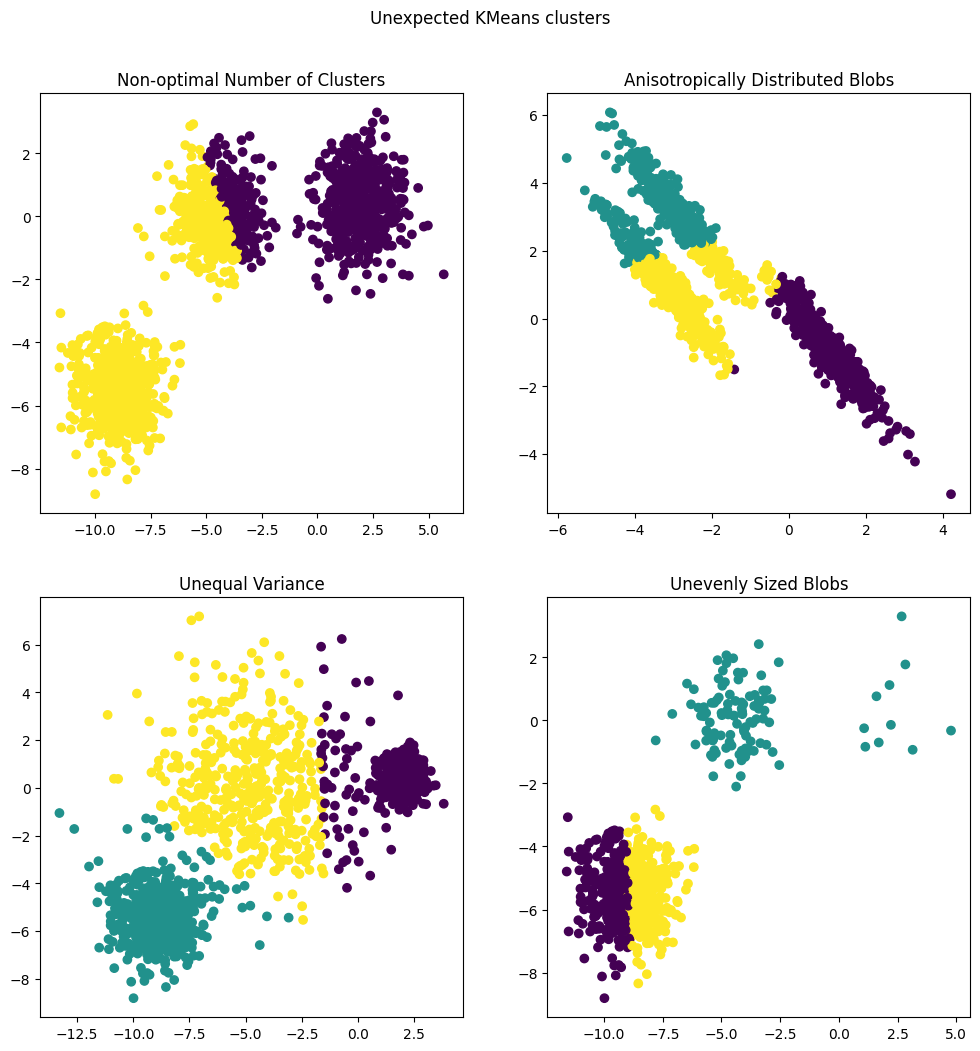

In [ ]:

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Non-optimal Number of Clusters")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_varied)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_filtered)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Unexpected KMeans clusters").set_y(0.95)
plt.show()

## Possible solutions  
For an example on how to find a correct number of blobs, see [Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/1.2/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py). In this case it suffices to set n_clusters=3.

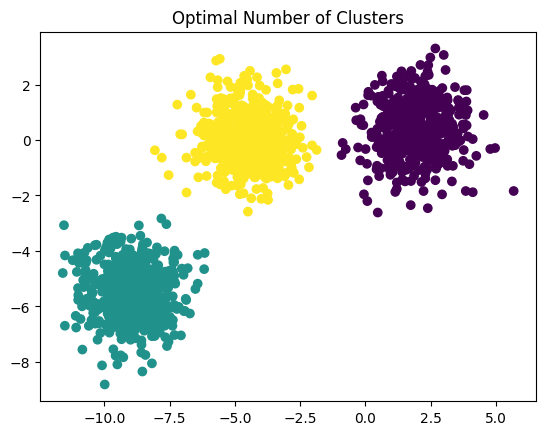

In [ ]:
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()

To deal with unevenly sized blobs one can increase the number of random initializations. In this case we set n_init=10 to avoid finding a sub-optimal local minimum. For more details see [Clustering sparse data with k-means](https://scikit-learn.org/1.2/auto_examples/text/plot_document_clustering.html#kmeans-sparse-high-dim).

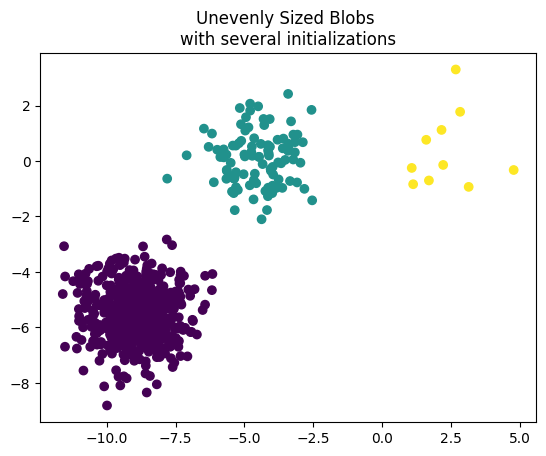

In [ ]:
y_pred = KMeans(n_clusters=3, n_init=10, random_state=random_state).fit_predict(
    X_filtered
)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs \nwith several initializations")
plt.show()

As anisotropic and unequal variances are real limitations of the k-means algorithm, here we propose instead the use of [GaussianMixture](https://scikit-learn.org/1.2/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture), which also assumes gaussian clusters but does not impose any constraints on their variances. Notice that one still has to find the correct number of blobs (see Gaussian Mixture Model Selection).

For an example on how other clustering methods deal with anisotropic or unequal variance blobs, see the example Comparing different clustering algorithms on toy datasets.

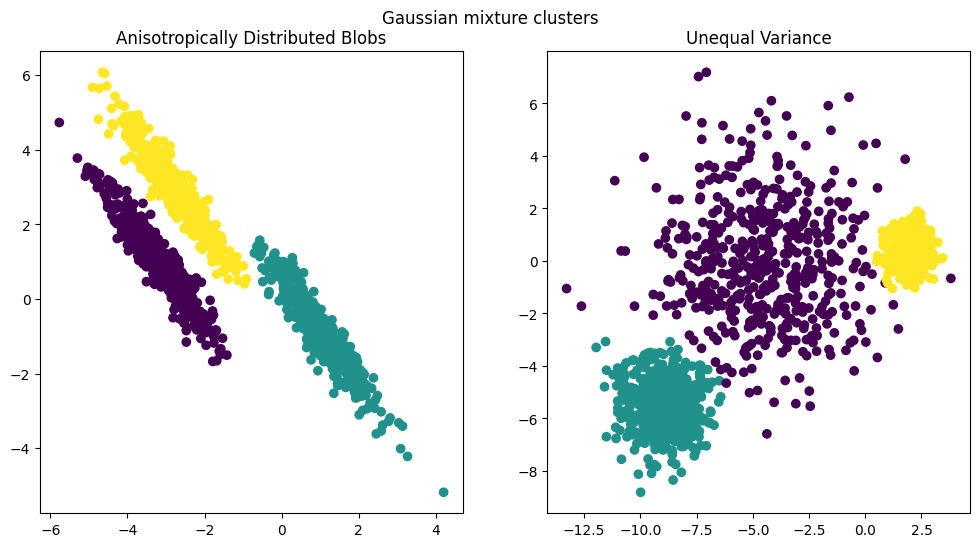

In [ ]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

y_pred = GaussianMixture(n_components=3).fit_predict(X_aniso)
ax1.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
ax1.set_title("Anisotropically Distributed Blobs")

y_pred = GaussianMixture(n_components=3).fit_predict(X_varied)
ax2.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
ax2.set_title("Unequal Variance")

plt.suptitle("Gaussian mixture clusters").set_y(0.95)
plt.show()

# Final remarks
In high-dimensional spaces, Euclidean distances tend to become inflated (not shown in this example). Running a dimensionality reduction algorithm prior to k-means clustering can alleviate this problem and speed up the computations (see the example Clustering text documents using k-means).

In the case where clusters are known to be isotropic, have similar variance and are not too sparse, the k-means algorithm is quite effective and is one of the fastest clustering algorithms available. This advantage is lost if one has to restart it several times to avoid convergence to a local minimum.